In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
crime_df=pd.read_csv("Mar424_converted_77_Features", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [5]:
# # Drop all the weather
# crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
#        'Avg_Pressure','Total_Precipitation'], axis =1)

# Droop all victim
crime_df=crime_df.drop(['Vict_Sex_M', 'Vict_Sex_X','Vict_Age','Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White'], axis =1)

In [6]:
print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 69)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'LAT', 'LON', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation', 'Crime_Category', 'Crime_Category_Code',
       'Weapon_Reported', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='objec

In [7]:
# Selecting predictor and target variables
X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Model Logistic without victim: lr_wo_victim

In [10]:
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.7190586742168766
Confusion Matrix:
[[136123   1464      0   3197      0    578   2169      0]
 [    58  19106      0      0      0    165  22259      0]
 [  8063   3717      0    111      0  23465   7366      0]
 [ 21134    227      0   4140      0    429    414      0]
 [  5252   2885      0    476      0    200   4511      0]
 [  8179   2158      0   1166      0 220678   4346      0]
 [  4330  14494      1      7      0    870  34678      0]
 [   888   5521      0      0      0      0  11936      0]]



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.74      0.95      0.83    143531
        Fraud and Financial Crimes       0.39      0.46      0.42     41588
              Miscellaneous Crimes       0.00      0.00      0.00     42722
             Robbery and Extortion       0.46      0.16      0.23     26344
                   Sexual Offenses       0.00      0.00      0.00     13324
                Theft and Burglary       0.90      0.93      0.91    236527
     Vandalism and Property Damage       0.40      0.64      0.49     54380
 Violations and Restraining Orders       0.00      0.00      0.00     18345

                          accuracy                           0.72    576761
                         macro avg       0.36      0.39      0.36    576761
                      weighted avg       0.64      0.72      0.67    576761



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
9       Weapon_Reported    2.290476
4          Avg_Dewpoint    0.057929
3              Avg_Temp    0.056665
46             Month_12    0.054039
35        Day_of_Week_6    0.050130
37              Month_3    0.048735
39              Month_5    0.048608
36              Month_2    0.043127
45             Month_11    0.038087
53            Year_2017    0.035508
38              Month_4    0.033406
40              Month_6    0.026324
34        Day_of_Week_5    0.022919
44             Month_10    0.018717
41              Month_7    0.018642
59            Year_2023    0.017996
2                   LON    0.016486
55            Year_2019    0.013680
56            Year_2020    0.012396
57            Year_2021    0.011022
51            Year_2015    0.011013
42              Month_8    0.010251
27              AREA_19    0.010216
8   Total_Precipitation    0.009659
43              Month_9    0.009453
52            Year_2016    0.007397
6      

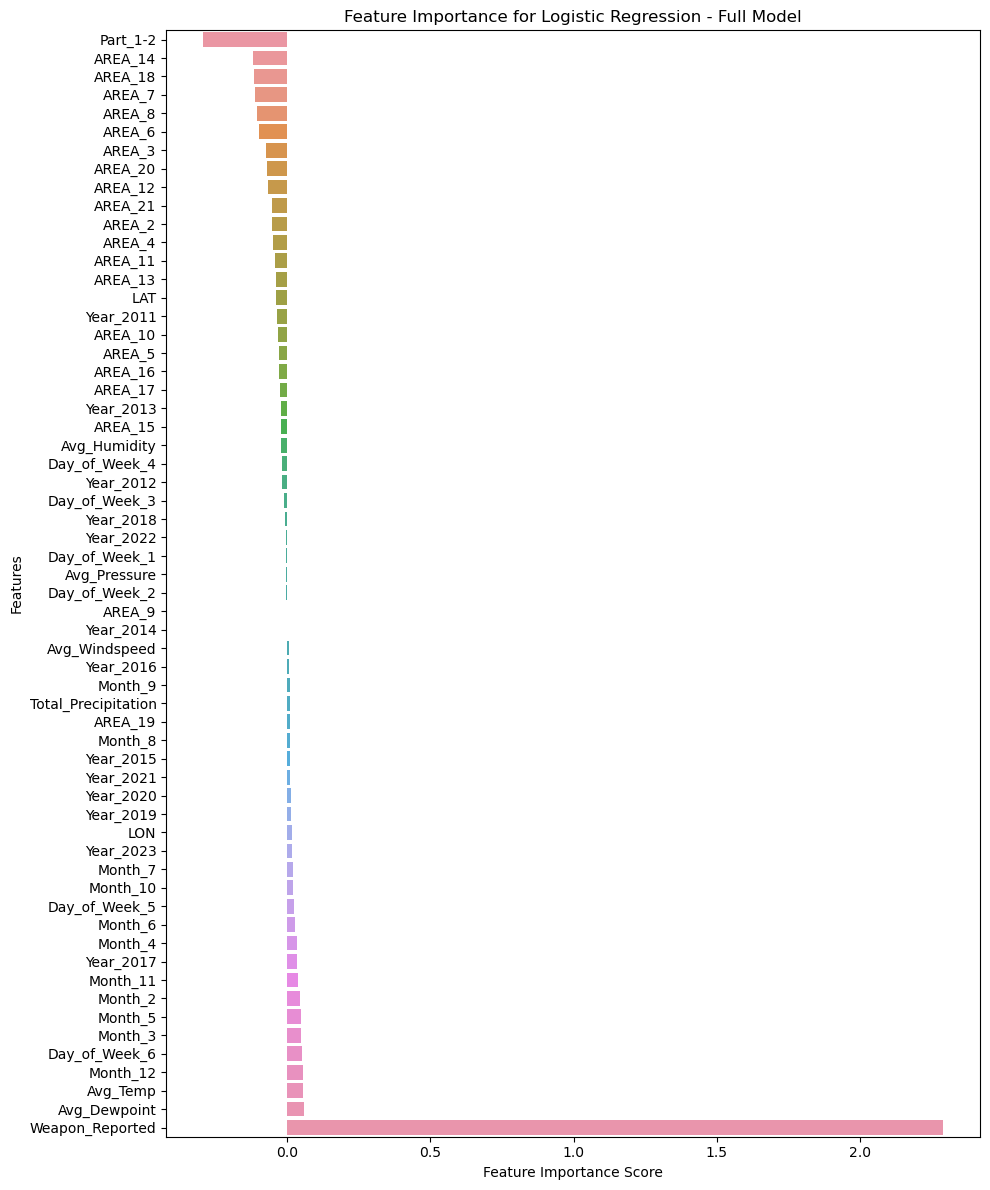

In [12]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model XGBOOST: xgboost_wo_victim

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost: Withou Victims")

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")

XGBoost: Withou Victims
Accuracy: 0.7309145382576145
Confusion Matrix:
[[134406   1389     32   4107    102   1274   2218      3]
 [    58  21605      2      0      0    260  19596     67]
 [  7939   3656    143    105      7  23557   7238     77]
 [ 18727    214      0   5854     47   1076    421      5]
 [  4720   2938      6    639    225    370   4399     27]
 [  6125   2101      4   1398     22 223219   3638     20]
 [  4302  13337      9     14      0   1022  35514    182]
 [   888   5132      8      0      3     35  11682    597]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.94      0.84    143531
        Fraud and Financial Crimes       0.43      0.52      0.47     41588
              Miscellaneous Crimes       0.70      0.00      0.01     42722
             Robbery and Extortion       0.48      0.22      0.30     26344
                   Sexual Offenses       0.55      

In [14]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
9       Weapon_Reported    0.449941
0              Part_1-2    0.448852
22              AREA_14    0.018852
13               AREA_5    0.004953
55            Year_2019    0.003664
59            Year_2023    0.003614
35        Day_of_Week_6    0.003543
15               AREA_7    0.003232
57            Year_2021    0.003221
26              AREA_18    0.002857
54            Year_2018    0.002823
16               AREA_8    0.002782
34        Day_of_Week_5    0.002750
47            Year_2011    0.002272
56            Year_2020    0.002196
58            Year_2022    0.002153
48            Year_2012    0.002052
29              AREA_21    0.001844
12               AREA_4    0.001840
21              AREA_13    0.001761
28              AREA_20    0.001517
2                   LON    0.001452
23              AREA_15    0.001445
49            Year_2013    0.001421
14               AREA_6    0.001356
53            Year_2017    0.001316
20     

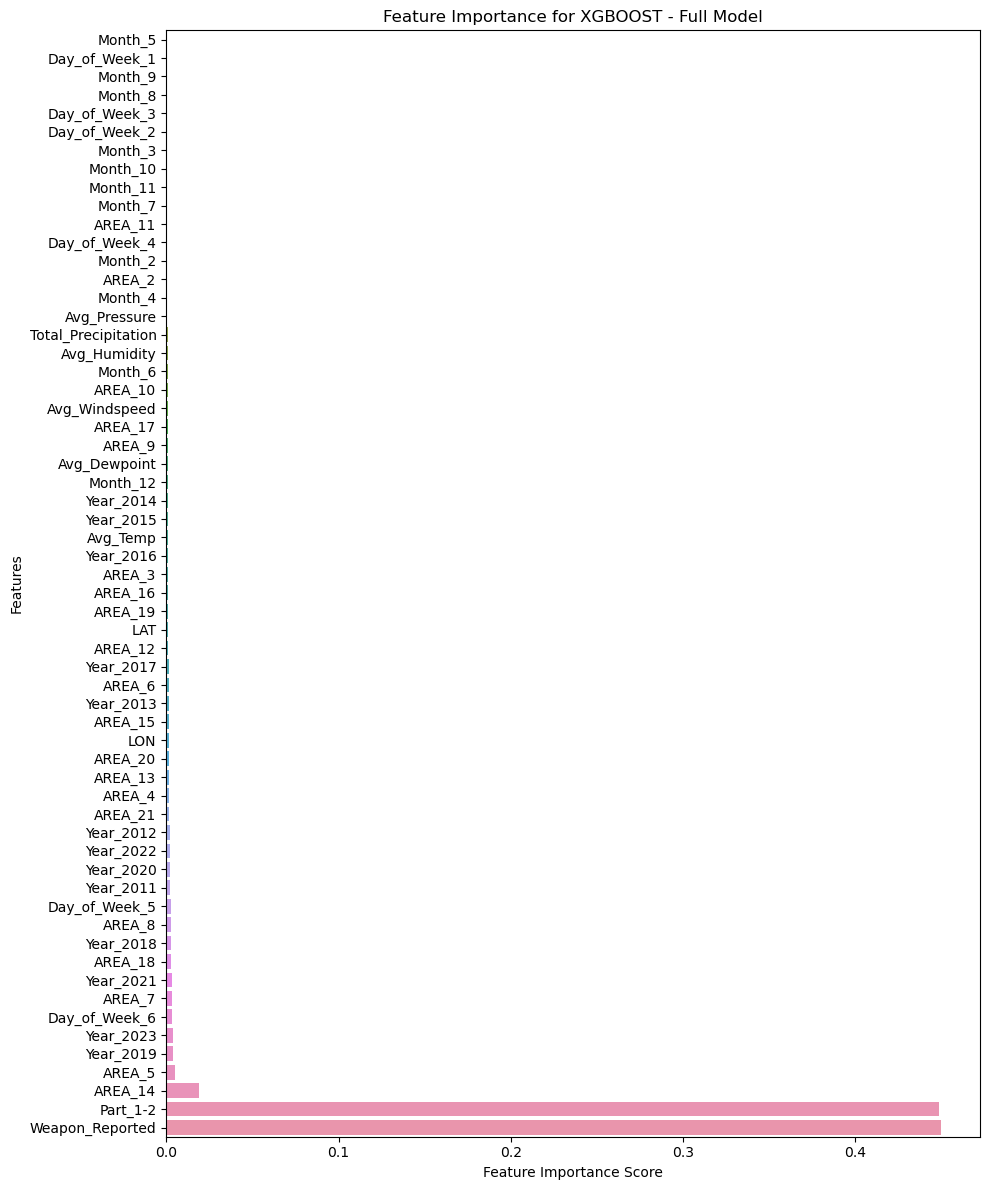

In [15]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model Random Forest: rf_wo_victim

In [16]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.7572738101223904
Confusion Matrix:
[[129544    950   1250   7016    726   1767   1970    308]
 [   463  23194   1284     52    906    940  12446   2303]
 [  5672   2653   9915    169    302  19248   3981    782]
 [ 11893    148     98  11964    417   1538    230     56]
 [  3293   2092    272   1053   3104    521   2540    449]
 [  3679   1662   3850   2001    280 222352   2290    413]
 [  3993  11145   1876    107   1012   1703  31048   3496]
 [   900   3851    658     32    343    355   6561   5645]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.81      0.90      0.86    143531
        Fraud and Financial Crimes       0.51      0.56      0.53     41588
              Miscellaneous Crimes       0.52      0.23      0.32     42722
             Robbery and Extortion       0.53      0.45      0.49     26344
                   Sexual Offenses       0.

In [17]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                Feature  Importance
9       Weapon_Reported    0.248674
0              Part_1-2    0.216680
2                   LON    0.131316
1                   LAT    0.131286
5          Avg_Humidity    0.037385
3              Avg_Temp    0.037022
4          Avg_Dewpoint    0.036851
6         Avg_Windspeed    0.035671
7          Avg_Pressure    0.016796
31        Day_of_Week_2    0.004576
32        Day_of_Week_3    0.004530
30        Day_of_Week_1    0.004501
33        Day_of_Week_4    0.004418
8   Total_Precipitation    0.004017
34        Day_of_Week_5    0.003208
44             Month_10    0.003153
38              Month_4    0.003110
39              Month_5    0.003040
37              Month_3    0.002994
45             Month_11    0.002992
40              Month_6    0.002964
43              Month_9    0.002748
41              Month_7    0.002736
52            Year_2016    0.002713
42              Month_8    0.002707
36              Month_2    0.002684
46     

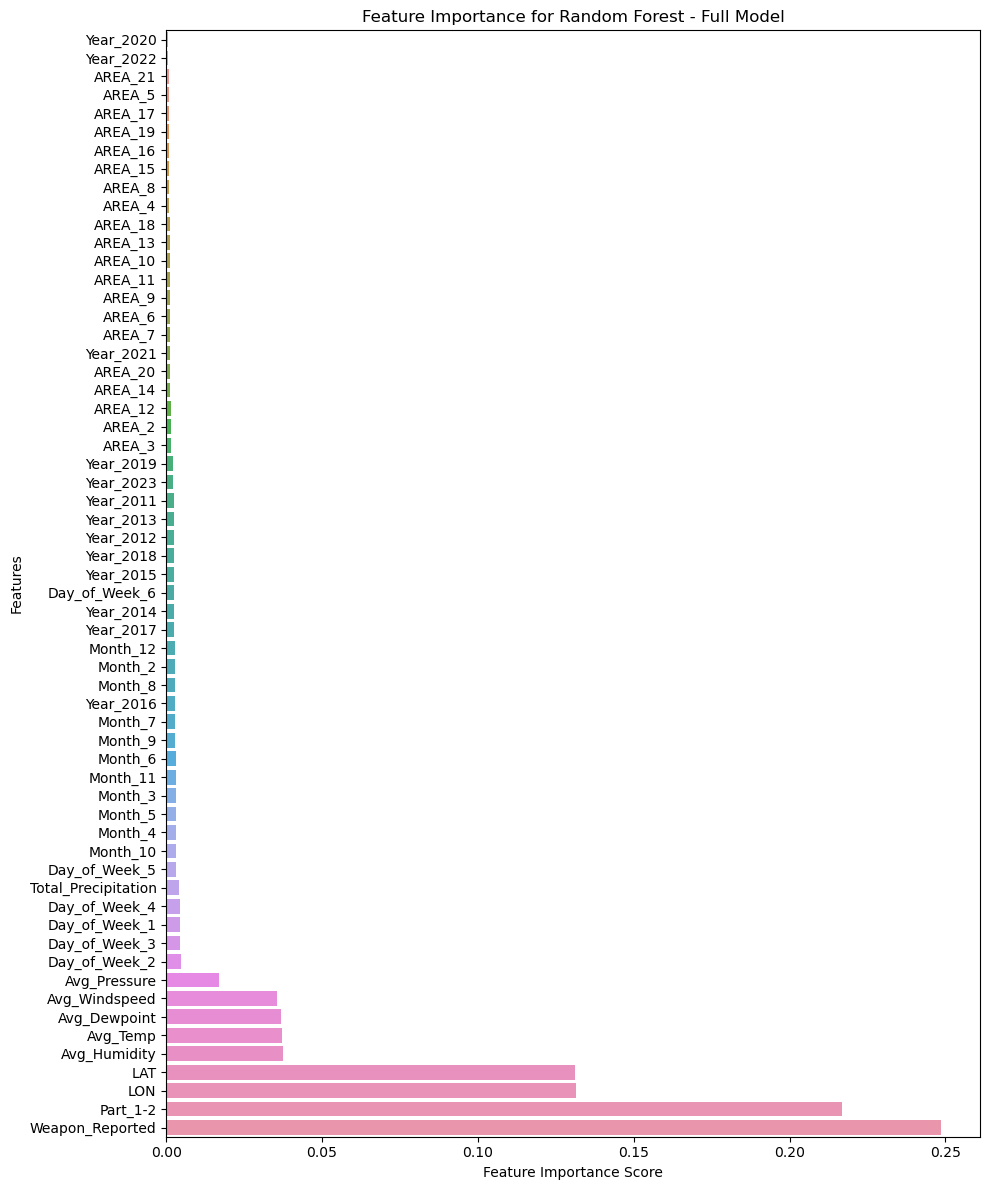

In [18]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model KNN: knn7_wo_victim

In [13]:
# Training the model and predicting on test data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.7056649114624602
Confusion Matrix:
[[129183   1726   1008   6388    346   2901   1806    173]
 [   664  22094   1424     24    644   2817  12355   1566]
 [  7542   4130   1995    194    212  23867   4266    516]
 [ 16836    247    110   6715    172   1992    234     38]
 [  4367   3044    396    868    623   1067   2613    346]
 [  5867   2608   1953   1804    175 221337   2474    309]
 [  4986  16175   2069     72    753   4815  23190   2320]
 [  1136   5822    697     10    334   1497   6986   1863]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.90      0.82    143531
        Fraud and Financial Crimes       0.40      0.53      0.45     41588
              Miscellaneous Crimes       0.21      0.05      0.08     42722
             Robbery and Extortion       0.42      0.25      0.32     26344
                   Sexual Offenses       0.19      0.05      0.08     1

In [ ]:
# Take too long ?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [15]:
# X columns
print('Shape of X:', X.shape)
X.columns

Shape of X: (2883802, 60)


Index(['Part_1-2', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity',
       'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Weapon_Reported', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='object')

# 

# Class Balancing

In [ ]:
# 'Crime_Category' is target variable
class_counts = crime_df['Crime_Category'].value_counts()
print(class_counts)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Training the logistic regression model with class_weight='balanced'
# logreg = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')
# logreg.fit(X_train_scaled, y_train.ravel())  # Ensure y_train is properly shaped with ravel()
# y_pred = logreg.predict(X_test_scaled)

# # Model Evaluation
# print("Logistic Regression with Class Weights")
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
# print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
# # 'Crime_Category' is target variable
# class_counts = crime_df['Crime_Category'].value_counts()
# print(class_counts)